# F1 Perfromance Analysis

In [1]:
import requests
import tkinter as tk
import pandas as pd
import json
import numpy as np

In [2]:
def create_db(year, constructor):
    team_a_year = year
    team_a_constructor = constructor
    team_a_constructor = '_'.join(team_a_constructor.split())
    url = f"https://ergast.com/api/f1/{team_a_year}/constructors/{team_a_constructor}/qualifying.json"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = json.loads(response.text)
    df = pd.json_normalize(data["MRData"]["RaceTable"]["Races"])
    return df

In [3]:
def create_constructor_year_list(year):
    team_year = year
    url = f"https://ergast.com/api/f1/{team_year}/constructors.json"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = json.loads(response.text)
    df = pd.json_normalize(data["MRData"]["ConstructorTable"]["Constructors"])
    return df

In [4]:
def pull_constructor_names(year):
    df2 = year["constructorId"] 
    return df2.to_numpy()

In [5]:
def pull_driver_times(team, i):
    driver1_list = []
    driver2_list = []
    try:
        driver1_q3 = team.QualifyingResults[i][0]["Q3"]
        driver1_list.append(driver1_q3)
    except KeyError:
        try:
            driver1_q2 = team.QualifyingResults[i][0]["Q2"]
        except KeyError:
            driver1_q1 = team.QualifyingResults[i][0]["Q1"]
        except IndexError:
            pass
    except IndexError:
        pass
    try:
        driver1_q2 = team.QualifyingResults[i][0]["Q2"]
        driver1_list.append(driver1_q2)
    except KeyError:
        pass
    except IndexError:
            pass
    try:
        driver1_q1 = team.QualifyingResults[i][0]["Q1"]
        driver1_list.append(driver1_q1)
    except KeyError:
        pass
    except IndexError:
            pass
    #####
    try:
        driver2_q3 = team.QualifyingResults[i][1]["Q3"]
        driver2_list.append(driver2_q3)
    except KeyError:
        try:
            driver2_q2 = team.QualifyingResults[i][1]["Q2"]
        except KeyError:
            driver2_q1 = team.QualifyingResults[i][1]["Q1"]
        except IndexError:
            pass
    except IndexError:
            pass
    try:
        driver2_q2 = team.QualifyingResults[i][1]["Q2"]
        driver2_list.append(driver2_q2)
    except KeyError:
        pass     
    except IndexError:
            pass
    try:
        driver2_q1 = team.QualifyingResults[i][1]["Q1"]
        driver2_list.append(driver2_q1) 
    except KeyError:
        pass
    except IndexError:
            pass
    
    # Make this a dictonary?
    return driver1_list,driver2_list

In [6]:
def driver_fastest_lap(driver1_list, driver2_list):
    driver1_list_seconds = []
    try:
        for i in driver1_list:
            x = i[0]
            x = int(x) * 60
            y = float(i[2:8])
            driver1_list_seconds.append(round(x+y, 3))
    
    except IndexError:
        pass
    driver2_list_seconds = []
    try:    
        for i in driver2_list:
            x = i[0]
            x = int(x) * 60
            y = float(i[2:8])
            driver2_list_seconds.append(round(x+y, 3))
        return(min(driver1_list_seconds),min(driver2_list_seconds))
    except IndexError:
         pass

In [7]:
def calcualte_average_time(race_time_list):
    for i in race_time_list:
        x = i[0]
        x = int(x) * 60
        y = float(i[2:8])
        average_time_list.append(round(x+y, 3))
    g = 0
    for i in average_time_list:
        g += i
    g = g/len(average_time_list)
    return g


In [8]:
def year_fastest_times(db):
    x=True
    i=0
    c=1
    year_fastest = []
    while x:   
        try:
            driver1, driver2 = pull_driver_times(db,i)
            try:
                year_fastest.append(min(driver_fastest_lap(driver1,driver2)))
            except TypeError:
                pass
            i+=1
            c+=1
        except KeyError:
            x=False
    return year_fastest

In [9]:
RB_DB_2021 = create_db(2022, "Red Bull")
display(RB_DB_2021)

,season,round,url,raceName,date,time,QualifyingResults,Circuit.circuitId,Circuit.url,Circuit.circuitName,Circuit.Location.lat,Circuit.Location.long,Circuit.Location.locality,Circuit.Location.country
0,2022,1,http://en.wikipedia.org/wiki/2022_Bahrain_Gran...,Bahrain Grand Prix,2022-03-20,15:00:00Z,"[{'number': '1', 'position': '2', 'Driver': {'...",bahrain,http://en.wikipedia.org/wiki/Bahrain_Internati...,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain
1,2022,2,http://en.wikipedia.org/wiki/2022_Saudi_Arabia...,Saudi Arabian Grand Prix,2022-03-27,17:00:00Z,"[{'number': '11', 'position': '1', 'Driver': {...",jeddah,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,Jeddah Corniche Circuit,21.6319,39.1044,Jeddah,Saudi Arabia
2,2022,3,http://en.wikipedia.org/wiki/2022_Australian_G...,Australian Grand Prix,2022-04-10,05:00:00Z,"[{'number': '1', 'position': '2', 'Driver': {'...",albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,-37.8497,144.968,Melbourne,Australia
3,2022,4,http://en.wikipedia.org/wiki/2022_Emilia_Romag...,Emilia Romagna Grand Prix,2022-04-24,13:00:00Z,"[{'number': '1', 'position': '1', 'Driver': {'...",imola,http://en.wikipedia.org/wiki/Autodromo_Enzo_e_...,Autodromo Enzo e Dino Ferrari,44.3439,11.7167,Imola,Italy
4,2022,5,http://en.wikipedia.org/wiki/2022_Miami_Grand_...,Miami Grand Prix,2022-05-08,19:30:00Z,"[{'number': '1', 'position': '3', 'Driver': {'...",miami,http://en.wikipedia.org/wiki/Miami_Internation...,Miami International Autodrome,25.9581,-80.2389,Miami,USA
5,2022,6,http://en.wikipedia.org/wiki/2022_Spanish_Gran...,Spanish Grand Prix,2022-05-22,13:00:00Z,"[{'number': '1', 'position': '2', 'Driver': {'...",catalunya,http://en.wikipedia.org/wiki/Circuit_de_Barcel...,Circuit de Barcelona-Catalunya,41.57,2.26111,Montmeló,Spain
6,2022,7,http://en.wikipedia.org/wiki/2022_Monaco_Grand...,Monaco Grand Prix,2022-05-29,13:00:00Z,"[{'number': '11', 'position': '3', 'Driver': {...",monaco,http://en.wikipedia.org/wiki/Circuit_de_Monaco,Circuit de Monaco,43.7347,7.42056,Monte-Carlo,Monaco
7,2022,8,http://en.wikipedia.org/wiki/2022_Azerbaijan_G...,Azerbaijan Grand Prix,2022-06-12,11:00:00Z,"[{'number': '11', 'position': '2', 'Driver': {...",baku,http://en.wikipedia.org/wiki/Baku_City_Circuit,Baku City Circuit,40.3725,49.8533,Baku,Azerbaijan
8,2022,9,http://en.wikipedia.org/wiki/2022_Canadian_Gra...,Canadian Grand Prix,2022-06-19,18:00:00Z,"[{'number': '1', 'position': '1', 'Driver': {'...",villeneuve,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...,Circuit Gilles Villeneuve,45.5,-73.5228,Montreal,Canada
9,2022,10,http://en.wikipedia.org/wiki/2022_British_Gran...,British Grand Prix,2022-07-03,14:00:00Z,"[{'number': '1', 'position': '2', 'Driver': {'...",silverstone,http://en.wikipedia.org/wiki/Silverstone_Circuit,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK


In [10]:

redbull2022 = create_db(2022, "Alphatauri")
print(year_fastest_times(redbull2022))
mclaren2022 = create_db(2022, "Mclaren")
print(year_fastest_times(mclaren2022))

[91.635, 79.226, 80.474, 89.69, 80.639, 72.797, 102.845, 94.492, 101.68, 66.16, 92.78, 79.24, 105.827, 71.427]
[92.008, 89.651, 78.703, 79.294, 89.634, 80.287, 71.849, 103.398, 83.749, 101.515, 66.33, 92.032, 77.769, 105.603, 71.116]


In [11]:
constructors_2022 = create_constructor_year_list(2022)
print(pull_constructor_names(constructors_2022))
for i in pull_constructor_names(constructors_2022):
    print(year_fastest_times(create_db(2022, i)))


['alfa' 'alphatauri' 'alpine' 'aston_martin' 'ferrari' 'haas' 'mclaren'
 'mercedes' 'red_bull' 'williams']
[91.56, 89.183, 79.251, 79.73, 89.475, 79.608, 72.909, 103.777, 84.03, 100.791, 66.319, 93.034, 78.157, 106.085, 71.704]
[91.635, 79.226, 80.474, 89.69, 80.639, 72.797, 102.845, 94.492, 101.68, 66.16, 92.78, 79.24, 105.827, 71.427]
[91.621, 89.068, 78.815, 79.595, 80.638, 72.247, 103.173, 81.944, 101.598, 65.726, 92.552, 77.904, 105.18, 71.605]
[92.777, 90.256, 79.957, 89.996, 80.954, 72.613, 103.091, 94.512, 102.666, 66.847, 93.276, 79.137, 106.256, 71.416]
[90.558, 88.225, 77.868, 78.796, 88.796, 78.75, 71.376, 101.359, 82.096, 99.846, 65.013, 90.872, 77.421, 104.297, 70.363]
[91.461, 89.546, 80.104, 79.902, 90.423, 79.682, 72.921, 104.643, 82.96, 102.159, 65.879, 92.649, 78.825, 106.342, 71.42]
[92.008, 89.651, 78.703, 79.294, 89.634, 80.287, 71.849, 103.398, 83.749, 101.515, 66.33, 92.032, 77.769, 105.603, 71.116]
[91.048, 89.104, 78.825, 80.383, 89.625, 79.393, 72.112, 102.71

In [12]:
# Create a pandas DB that takes the year
# uses its postion in the list to  assigns  a track location with the times

def create_race_year_list(year):
    team_year = year
    url = f"https://ergast.com/api/f1/{team_year}/races.json"
    payload = {}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    data = json.loads(response.text)
    df = pd.json_normalize(data["MRData"]["RaceTable"])
    df = df.Races
    i = 0
    x = True
    race_listt = []
    real_list = []
    while x:
        try:
            g = df[0]
            race_listt.append(g)
            real_list.append(race_listt[0][i]["Circuit"]["circuitId"])
            i+=1
        except IndexError:
            x = False
    return real_list



In [13]:
def create_team_dictonary(team,year):
    local_year_list = create_race_year_list(year)
    local_db = create_db(year, team)
    local_db_times = (year_fastest_times(local_db))

    dictionary = dict(zip(local_year_list, local_db_times))
    return dictionary

team_alfa            89.183
team_alphatauri      79.226
team_alpine          89.068
team_aston_martin    90.256
team_ferrari         88.225
team_haas            89.546
team_mclaren         89.651
team_mercedes        89.104
team_red_bull        88.200
team_williams        90.492
Name: jeddah, dtype: float64
team_alfa            89.461
team_alphatauri      89.939
team_alpine          89.078
team_aston_martin    88.730
team_ferrari         88.420
team_haas            89.451
team_mclaren         89.243
team_mercedes        88.857
team_red_bull        88.265
team_williams        89.994
Name: jeddah, dtype: float64


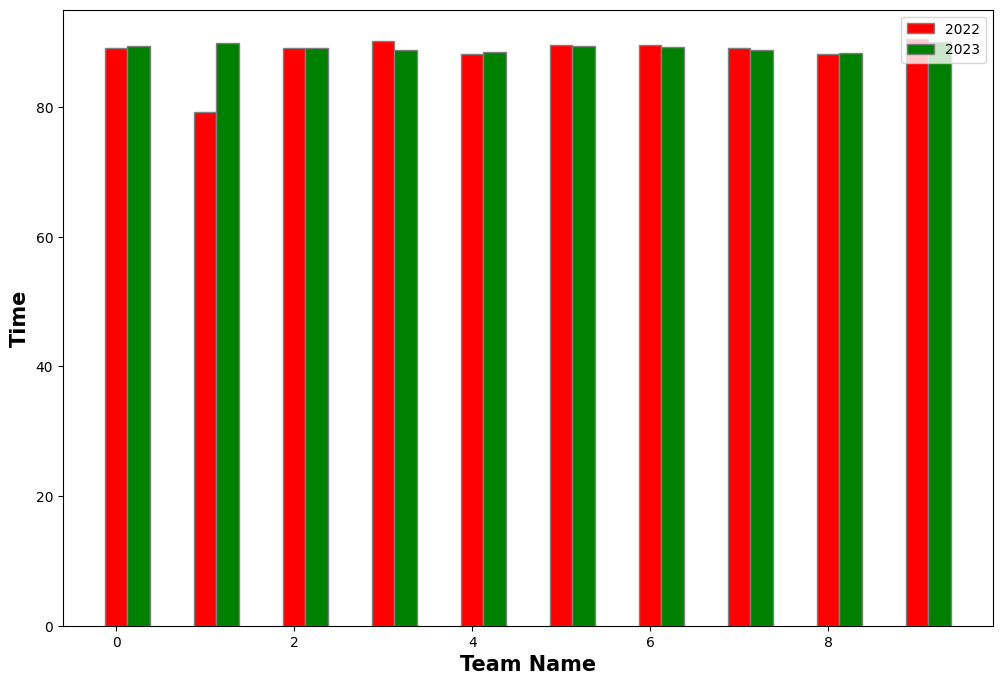

In [14]:
constructors_2022 = create_constructor_year_list(2022)
data_constrc_2022 = {}
for i in pull_constructor_names(constructors_2022):
    data_constrc_2022['team_'+str(i)]=(create_team_dictonary(i, 2022))
test = pd.DataFrame(data_constrc_2022)
test2 = test.iloc[1]
constructors_2023 = create_constructor_year_list(2023)
data_constrc_2023 = {}
for i in pull_constructor_names(constructors_2023):
    data_constrc_2023['team_'+str(i)]=(create_team_dictonary(i, 2023))
test3 = pd.DataFrame(data_constrc_2023)
test4 = test3.iloc[1]
print(test2)
print(test4)
from matplotlib import pyplot as plt
 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
br1 = np.arange(len(test2)) 
br2 = [x + barWidth for x in br1] 
 
plt.bar(br1, test2, color ='r', width = barWidth, 
        edgecolor ='grey', label ='2022') 
plt.bar(br2, test4, color ='g', width = barWidth, 
        edgecolor ='grey', label ='2023') 

plt.xlabel('Team Name', fontweight ='bold', fontsize = 15) 
plt.ylabel('Time', fontweight ='bold', fontsize = 15) 
plt.legend()
plt.show() 

